In [1]:
import scipy.io
data = scipy.io.loadmat('xTrain.mat')
print(data.keys())
xAmp = data['xAmp']
# print(xAmp)
# scipy.io.savemat('xAmpKL.mat',{'xAmp':xAmp})

dict_keys(['__header__', '__version__', '__globals__', 'xAmp', 'xLabel', 'xPha', 'xRaw'])


In [5]:
from hpelm.elm import ELM
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import MinMaxScaler
import itertools
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import OneHotEncoder
from functools import reduce
from scipy import signal
from sklearn.metrics import confusion_matrix
import datetime
import h5py

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt 
import mpl_toolkits.mplot3d
from sklearn.mixture import GaussianMixture

def KL_divergence(gmm1,gmm2):
    cov1=np.sqrt(gmm1.covariances_[0,:,:])
    cov2=np.sqrt(gmm2.covariances_[0,:,:])
    mean1=gmm1.means_
    mean2=gmm2.means_
    term1=np.log(np.linalg.det(cov1)/np.linalg.det(cov2))
    term2=np.trace(np.matmul(np.linalg.inv(cov1),cov2))-30
    term3=np.matmul(np.matmul(mean2-mean1,np.linalg.inv(cov1)),np.transpose(mean2-mean1))
    term_1=(term1+term2+term3)/2
    
    cov1=np.sqrt(gmm2.covariances_[0,:,:])
    cov2=np.sqrt(gmm1.covariances_[0,:,:])
    mean1=gmm2.means_
    mean2=gmm1.means_
    term1=np.log(np.linalg.det(cov1)/np.linalg.det(cov2))
    term2=np.trace(np.matmul(np.linalg.inv(cov1),cov2))-30
    term3=np.matmul(np.matmul(mean2-mean1,np.linalg.inv(cov1)),np.transpose(mean2-mean1))
    term_2=(term1+term2+term3)/2
    
    return term_1+term_2

[6, 9, 2, 3, 8, 5, 6, 6, 2, 1]
48
[0.125      0.1875     0.04166667 0.0625     0.16666667 0.10416667
 0.125      0.125      0.04166667 0.02083333]
[3, 8, 7, 7, 2, 9, 10, 2, 1, 9]
58
[0.05172414 0.13793103 0.12068966 0.12068966 0.03448276 0.15517241
 0.17241379 0.03448276 0.01724138 0.15517241]
0.4192153793001886
0.4192153793001886


(array([1., 2., 1., 0., 0., 0., 2., 1., 2., 1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

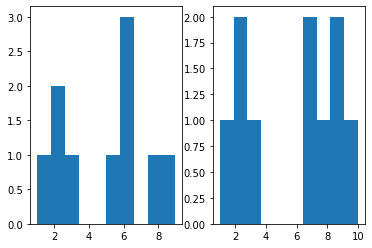

In [7]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
# 随机生成两个离散型分布
x = [np.random.randint(1, 11) for i in range(10)]
print(x)
print(np.sum(x))
px = x / np.sum(x)
print(px)
y = [np.random.randint(1, 11) for i in range(10)]
print(y)
print(np.sum(y))
py = y / np.sum(y)
print(py)

# 利用scipy API进行计算
# scipy计算函数可以处理非归一化情况，因此这里使用
# scipy.stats.entropy(x, y)或scipy.stats.entropy(px, py)均可
KL = scipy.stats.entropy(x, y) 
print(KL)

# 编程实现
KL = 0.0
for i in range(10):
    KL += px[i] * np.log(px[i] / py[i])
    # print(str(px[i]) + ' ' + str(py[i]) + ' ' + str(px[i] * np.log(px[i] / py[i])))

print(KL)

plt.subplot(121)
plt.hist(x)
plt.subplot(122)
plt.hist(y)